In [123]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [124]:
# Dynamics of the linear system
def linear_dynamic(x, t, x_d):
    A = [[-1.2, 0.3],[0.2, -2.4]]
    dvdt = np.dot(np.array(A),x) - np.dot(np.array(A),np.array(x_d))
    return dvdt

def simulation_single(system_dynamics, initial_state, time_step, time_bound, x_d):
    time_bound = float(time_bound)
    time_step = float(time_step)
    number_points = int(np.ceil(time_bound/time_step))
    t = [i*time_step for i in range(0,number_points)]
    if t[-1] != time_step:
        t.append(time_bound)
    newt = []
    for step in t:
        newt.append(float(format(step, '.4f')))
    t = newt

    sol = odeint(system_dynamics, initial_state, t, args=(x_d,), hmax=time_step)

    # Construct the final output
    trace = []
    for j in range(len(t)):
        #print t[j], current_psi
        point = []
        point.append(t[j])
        point.append(float(sol[j,0]))
        point.append(float(sol[j,1]))
        trace.append(point)
    return trace

def Euc_distance(point1, point2):
    return sqrt( (point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 )

def follow_wp(way_points, maximum_distance_to_transit):
    for i in range(len(way_points)-1):
        if i == 0:
            initial_state = way_points[i]
        target = way_points[i+1]
        print initial_state, target
        sol = simulation_single(linear_dynamic,initial_state, 0.05, 10.0, target)
        for j in range(len(sol)):
            point = sol[j]
            distance_to_target = Euc_distance(point[1:],target)
            if distance_to_target < maximum_distance_to_transit:
                break;
        if i == 0:
            traj = sol[0:j+1]
        else:
            traj = traj + sol[0:j+1]
        initial_state = sol[j][1:]
#     print traj
#     print sol[0:j+1]
    plt.scatter([row[0] for row in way_points], [row[1] for row in way_points],c='r', label='way points')
    plt.plot([row[0] for row in way_points], [row[1] for row in way_points], "-r", label='straight line connecting way points')
    plt.plot([row[1] for row in traj], [row[2] for row in traj], "-g", label='real trajectories')
    plt.legend()
    plt.show()
#     initial_point = way_points[0]

[0.0, 0.0] [0.0, 1.0]
[-0.009467519593462915, 0.9972909560533508] [1.0, 1.0]
[0.9902960195504663, 0.9984538552881215] [1.0, 0.0]
[1.0090591024179276, 0.002643607045422391] [0.5, 0.5]


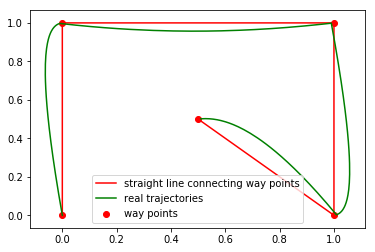

In [125]:
follow_wp([[0.0, 0.0],[0.0, 1.0], [1.0, 1.0], [1.0, 0.0], [0.5, 0.5]], 0.01)
# follow_wp([[0.0, 0.0],[0.0, 1.0]], 0.01)